### Name: Mostafa Hegazy
### Email: m.hegazy@innopolis.university
# Assignment 2:

In this assignment, you are going to solve three problems: 

1. Improving Nearest Neighbors Retrieval Speed (8 points)
2. Gaussian Naive Bayes (4 points)
3. PCA (3 points)

## 1. Improving Nearest Neighbors Retrieval Speed (8 points)

You are given a dataset of coordinates and information about places around the globe. Explore the dataset. You will be mostly working with 2d vectors which represent longitude and latitude.

length of the data points: X = 217352 Y = 217352


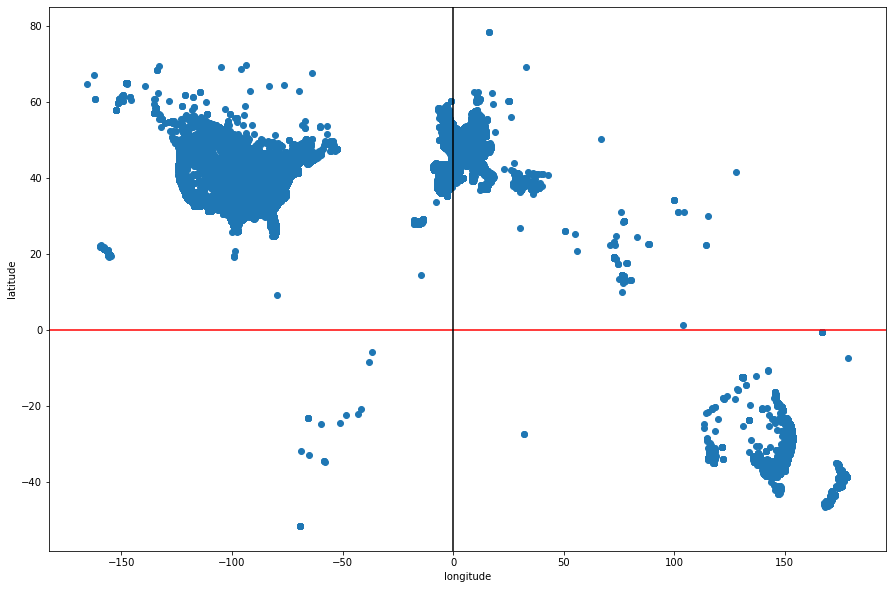

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open("poi_sample001.pickle", "rb") as f:
    dataset = pickle.load(f)
    
X = [v[0][0] for v in dataset]
Y = [v[0][1] for v in dataset]

dataset = np.array(dataset)
print('length of the data points: X =',len(X),'Y =', len(Y))

plt.figure(figsize=(15, 10))
a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.axhline(0, color='red')
plt.axvline(0, color='black')
plt.scatter(X, Y)
plt.show()

#### Explore the Data

In [2]:
import pandas as pd

dataset_df = pd.DataFrame(dataset) 

dataset_df.head(10)

,0,1
0,"[55.3115863, 25.080274]","REIDIN.com, Professional, Computer Services. A..."
1,"[13.9706993103, 46.6813430786]","Bahnhof Ossiach-Bodensdorf. AT, Bodensdorf,"
2,"[13.1305770874, 47.696975708]",K.Ä.B. Krankenhaus- und Ärzte-Bedarf Handelsge...
3,"[9.5845870972, 47.2279167175]","Dr. Walter Kosmath GmbH, Banks & Credit Unions..."
4,"[14.4373216629, 48.0563087463]","NOGRASEK BaugesmbH. AT, Steyr, Karl-Punzer-Str..."
5,"[9.9815998077, 47.0940589905]","Kapell-Bahn. AT, Schruns,"
6,"[13.484749794, 48.203540802]",Motion-World Ges.mb.H. Wechselbilder - Wackelb...
7,"[12.4170484543, 47.4149017334]","Bodendesign Markus Dorn. AT, Kitzbühel, Bergin..."
8,"[16.3842964172, 48.1774940491]",Bäko-österreich Großeinkauf d Bäcker u Kondito...
9,"[13.188337326, 47.4777755737]","Schwimmbad. AT, Werfen,"


In [3]:
print("Number of NaNs: ",pd.isna(dataset_df).sum().sum())
dataset_df.describe

Number of NaNs:  0


<bound method NDFrame.describe of                                      0  \
0              [55.3115863, 25.080274]   
1       [13.9706993103, 46.6813430786]   
2        [13.1305770874, 47.696975708]   
3        [9.5845870972, 47.2279167175]   
4       [14.4373216629, 48.0563087463]   
...                                ...   
217347         [-73.982833, 40.745153]   
217348         [-96.775571, 32.840889]   
217349        [-121.922728, 37.370632]   
217350         [-73.986992, 40.743079]   
217351          [-75.60762, 39.959546]   

                                                        1  
0       REIDIN.com, Professional, Computer Services. A...  
1            Bahnhof Ossiach-Bodensdorf. AT, Bodensdorf,   
2       K.Ä.B. Krankenhaus- und Ärzte-Bedarf Handelsge...  
3       Dr. Walter Kosmath GmbH, Banks & Credit Unions...  
4       NOGRASEK BaugesmbH. AT, Steyr, Karl-Punzer-Str...  
...                                                   ...  
217347  InVision., Professional, Computer

### 1.1 Simple NN Search

Implement the simplest form of NN search (exhaustive search).
Your function should: 
1. Calculate the distance between the test point and each dataset point using euclidean distance.
2. Sort the dataset according to calculated distance in ascending order.
3. Return the top K points from the sorted dataset.

You need to implement this from scratch. Don't use library solutions. 
It is okay to use library function for eucliden distance.

In [4]:
import numpy as np

def simple_nns(v, data, k):
    """
    param: v: test point
    param: data: dataset
    param: k: number of nearest neighbors to retrive
    return: list of nearest points from the dataset
    """
    ### implement simple NN Search
    ## 1- Calculate the distance between the test point and each point in the data set
    ## Using the Eucliden distance
    # Transform the data into a numpy array for easier handling
    data_dst = np.hstack((data,np.zeros((len(data))).reshape(-1,1)))
    v = np.array(v)
    
    # Loop to get the distances
    for i in range(data_dst.shape[0]):
        # Get the difference vector between the pivot point and each point in the dataset
        difference = v - data_dst[i,0]
        # Get the squared distance from the pivot point to each point in the dataset
        data_dst[i,2] = difference @ difference

    ## 2- Sort the dataset according to calculated distance in ascending order
    sorted_dst = data_dst[:, 2].argsort()

    ## 3- Return the top K points from the sorted dataset
    return data_dst[sorted_dst[0:k],0:2]

Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

[['2.3484830856' '48.8671951294'
  'Sa Besson Pourquoi Pas, Shopping, Clothing, Apparel, & Fashions. FR, , 100 Rue Réaumur 75002 Paris']
 ['2.3516469002' '48.8658294678'
  "Claude D'alban Diffusion Sarl, Shopping, Clothing, Apparel, & Fashions. FR, , 23 Rue De Palestro 75002 Paris"]
 ['2.3518240452' '48.8662605286'
  'Eliopoulos Demetre, Shopping, Clothing, Apparel, & Fashions. FR, , 53 Rue Reaumur 75002 Paris']
 ['2.3477900028' '48.8731498718'
  'Zaguedoun Abraham, Shopping, Clothing, Apparel, & Fashions. FR, , 31 Rue Du Fg Poissonniere 75009 Paris']
 ['2.3578190804' '48.8712768555'
  "Usa Blues Sarl, Shopping, Clothing, Apparel, & Fashions. FR, , 34 rue du Château d'Eau 75010 Paris"]
 ['2.3608949184' '48.8674430847'
  'Menport Sarl, Shopping, Luggage & Leather Goods. FR, , 19 Rue Meslay 75003 Paris']
 ['2.3245499134' '48.8824729919'
  'A La Serrurerie Saint Louis, Shopping, . FR, , 36 Rue De Turin 75008 Paris']
 ['2.3631598949' '48.8726272583'
  'Setes, Shopping, Clothing, Apparel, &

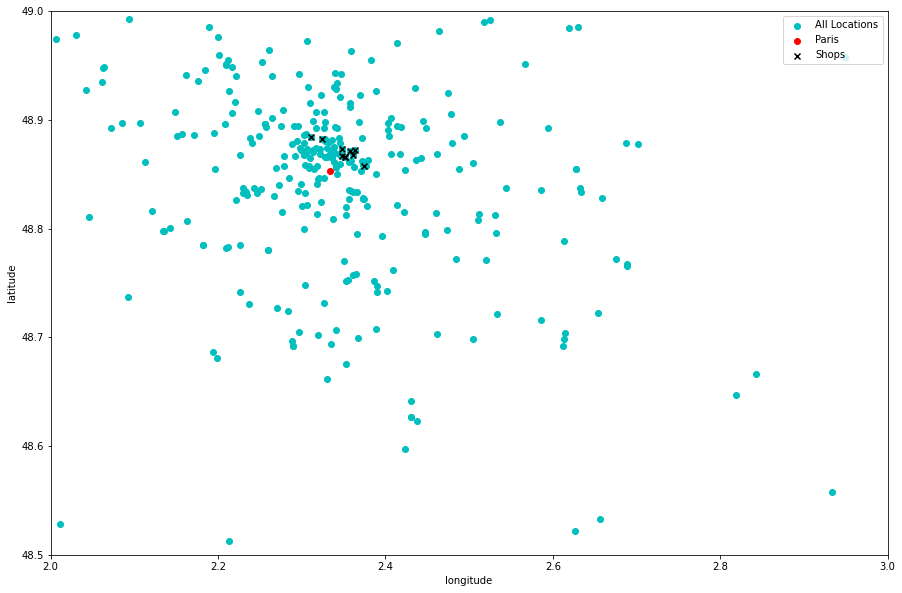

In [5]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
paris_nn = simple_nns(paris,dataset,100)

# Get the locations and the names as strings 
loc_X = np.array([v[0][0] for v in paris_nn])
loc_Y = np.array([v[0][1] for v in paris_nn])
loc_strings = np.array([v[1] for v in paris_nn])

# Transform the array into a dataframe to filter by a string
paris_nn_df = pd.DataFrame(np.transpose([loc_X,loc_Y, loc_strings]),columns=['Loc_X','Loc_Y', 'Loc_Str'])

# Check the word 'Shop'
check_str_df = paris_nn_df['Loc_Str'].str.contains("Shop")
# filter by 'Shop'
filtered_paris_nn_df = paris_nn_df[check_str_df]

# Transform back into numpy array
filtered_paris_nn = np.array(filtered_paris_nn_df)
print(filtered_paris_nn)

# Extract the filtered points
X_fil = [float(v[0]) for v in filtered_paris_nn]
Y_fil = [float(v[1]) for v in filtered_paris_nn]

# Plot the points
plt.figure(figsize=(15, 10))
a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.scatter(X, Y, c = 'c', marker="o")
plt.scatter(paris[0], paris[1], c = 'r')
plt.scatter(X_fil, Y_fil, c = 'black', marker="x")
plt.legend(["All Locations", "Paris", "Shops"], loc= 'upper right')
# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `simple_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

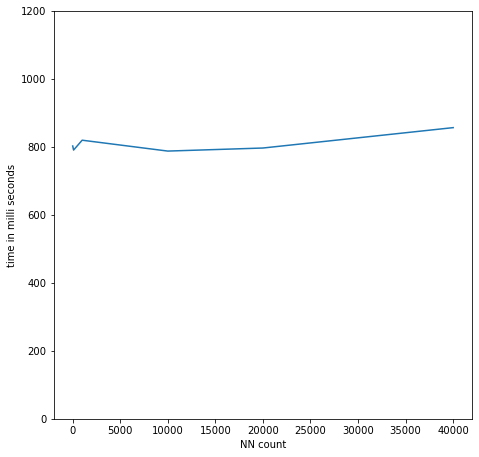

In [6]:
import random
import time

# Make a lambda function to get the current time in milli-seconds
current_milli_time = lambda: int(round(time.time() * 1000))

# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere
# initialize the retrival time array
retrival_time = np.array([])

for nn in nns:
    # Pick a random point
    rnd_point = random.choice(dataset)[0]
    
    # Start measuring the execution time
    t = current_milli_time()
    # Call the simple NN function
    trial = simple_nns(rnd_point, dataset, nn)
    # Retrieve the time taken
    retrival_time = np.append(retrival_time, current_milli_time()-t)

# plot the results
plt.figure(figsize=(7.5, 7.5))
a = plt.axes()
a.set_xlabel('NN count')
a.set_ylabel('time in milli seconds')
plt.plot(nns, retrival_time)
plt.ylim(0, 1200)
plt.show()

What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: </span>
The time is almost constant no matter how many nearest neighbours i search for, this is true because i take all the data points into account and get the distance between the test point and each data point in the dataset then sort them based on the distance, no matter if i want 10 points or 40k points the time will be almost the same because i don't make an aproximation of where my test point will lie so i simply search for its place against all the points

### 1.2 Improving NNS

Choose any method you like to speed up NN search, understand it thoroughly and learn how to apply it. Explain the way it works in few sentences and in your own words.

<span style="color:blue"> Your answer: </span>
I Chose the KD Tree method and i will explain how it works and its disadvantages next. <br>
How it works? <br>
KD Trees work by simply partitioning the space into smaller sub spaces based on a median point in each layer which acts as a seperating hyperplane, just like a binary tree but with more dimensions than 1 <br>

1- We choose an initial random dimension <br>
2- We find the median of the points in that dimension <br>
3- We split the data into 2 sub regions, 1 on the left of the point and 1 on the right based on the value compared to the median <br>
4- We go down 1 layer, choose another dimension then repeat the steps from 2 to 4 <br>
until we can no longer split <br>

This is much faster because if we have a new point that we want to find the neighbours we will compare the distances based on the leafs of the tree thus making us neglect a large portion of the data that is far away from the point and making the search time significantly faster. <br>

The disadvantages of KD tree is the higher dimensions, it can't handle the large dimensions and it will be better to use simple nn search at this point

Apply the chosen method on the geographic dataset. Similarly to the above, find the nearest neighbors and plot retrieval times.

In [7]:
from sklearn.neighbors import KDTree

# Make the data in this shape for the KD Tree (No_samples, No_features)
dataset_XY = np.array([i[0] for i in dataset])

# apply the chosen method
# Build the tree once only 
tree = KDTree(dataset_XY) 

def KD_approx_nns(v, data, k, tree):
    """
    param: v: test point
    param: data: dataset
    param: k: number of nearest neighbors to retrive
    return: list of nearest points from the dataset
    """
    ### implement Approx NN Search
    # reshape the point to be the same dimension as the query dimension
    v = np.array(v).reshape(-1,1).T
    
    inds = tree.query(v, k, return_distance= False)
    
    ## 3- Return the top K points from the sorted dataset
    return data[inds[0],:]

Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

[['2.3484830856' '48.8671951294'
  'Sa Besson Pourquoi Pas, Shopping, Clothing, Apparel, & Fashions. FR, , 100 Rue Réaumur 75002 Paris']
 ['2.3516469002' '48.8658294678'
  "Claude D'alban Diffusion Sarl, Shopping, Clothing, Apparel, & Fashions. FR, , 23 Rue De Palestro 75002 Paris"]
 ['2.3518240452' '48.8662605286'
  'Eliopoulos Demetre, Shopping, Clothing, Apparel, & Fashions. FR, , 53 Rue Reaumur 75002 Paris']
 ['2.3477900028' '48.8731498718'
  'Zaguedoun Abraham, Shopping, Clothing, Apparel, & Fashions. FR, , 31 Rue Du Fg Poissonniere 75009 Paris']
 ['2.3578190804' '48.8712768555'
  "Usa Blues Sarl, Shopping, Clothing, Apparel, & Fashions. FR, , 34 rue du Château d'Eau 75010 Paris"]
 ['2.3608949184' '48.8674430847'
  'Menport Sarl, Shopping, Luggage & Leather Goods. FR, , 19 Rue Meslay 75003 Paris']
 ['2.3245499134' '48.8824729919'
  'A La Serrurerie Saint Louis, Shopping, . FR, , 36 Rue De Turin 75008 Paris']
 ['2.3631598949' '48.8726272583'
  'Setes, Shopping, Clothing, Apparel, &

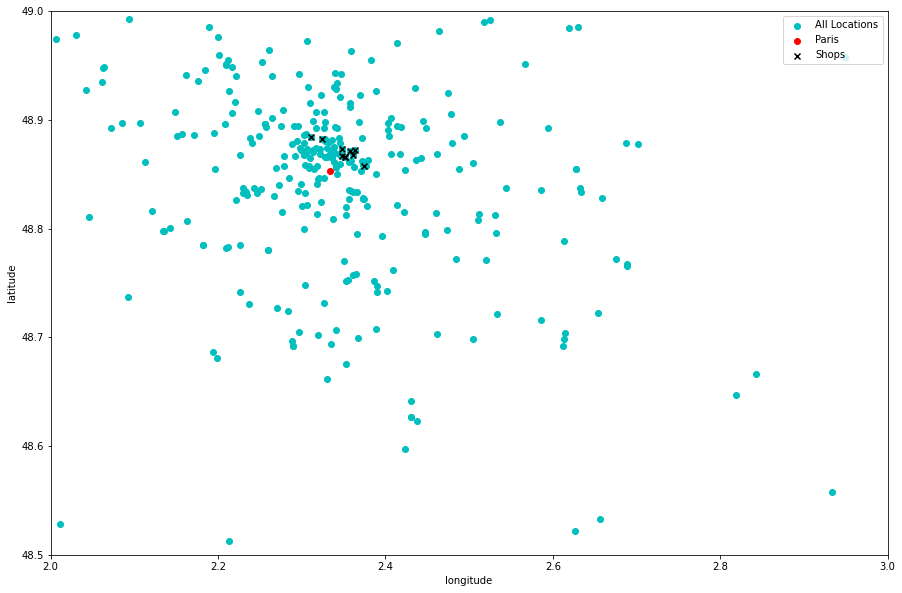

In [8]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
# Get the nearest neighbours using kd tree query search
paris_nn = KD_approx_nns(paris, dataset, k=100, tree=tree)

# Get the locations and the names as strings 
loc_X = np.array([v[0][0] for v in paris_nn])
loc_Y = np.array([v[0][1] for v in paris_nn])
loc_strings = np.array([v[1] for v in paris_nn])

# Transform the array into a dataframe to filter by a string
paris_nn_df = pd.DataFrame(np.transpose([loc_X,loc_Y, loc_strings]),columns=['Loc_X','Loc_Y', 'Loc_Str'])

# Check the word 'Shop'
check_str_df = paris_nn_df['Loc_Str'].str.contains("Shop")
# filter by 'Shop'
filtered_paris_nn_df = paris_nn_df[check_str_df]

# Transform back into numpy array
filtered_paris_nn = np.array(filtered_paris_nn_df)
print(filtered_paris_nn)

# Extract the filtered points
X_fil = [float(v[0]) for v in filtered_paris_nn]
Y_fil = [float(v[1]) for v in filtered_paris_nn]

# Plot the points
plt.figure(figsize=(15, 10))
a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.scatter(X, Y, c = 'c', marker="o")
plt.scatter(paris[0], paris[1], c = 'r')
plt.scatter(X_fil, Y_fil, c = 'black', marker="x")
plt.legend(["All Locations", "Paris", "Shops"], loc= 'upper right')

# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `approx_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

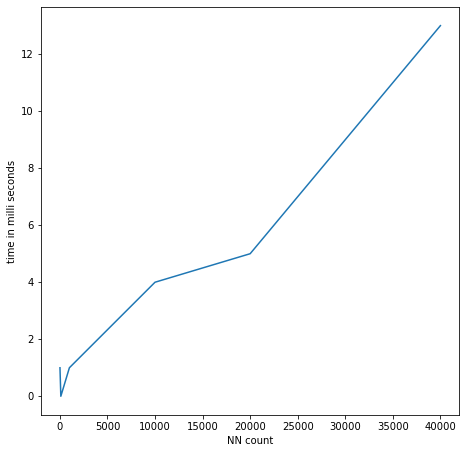

In [9]:
# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere 
# initialize the retrival time of kd tree array
retrival_time_KD = np.array([])

for nn in nns:
    # Pick a random point
    rnd_point = random.choice(dataset)[0]

    # Start measuring the execution time
    t = current_milli_time()
    # Call the KD Tree query function
    trial = KD_approx_nns(rnd_point, dataset, k=nn, tree=tree)
    # Retrieve the time taken
    retrival_time_KD = np.append(retrival_time_KD, current_milli_time()-t)

# plot the results
plt.figure(figsize=(7.5, 7.5))
a = plt.axes()
a.set_xlabel('NN count')
a.set_ylabel('time in milli seconds')
plt.plot(nns, retrival_time_KD)
plt.show()

What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: </span>
The Search time is significantly reduced because we don't search the whole data set, instead we search based on the value of the points compared to each leaf in the tree which makes us neglect a very large portion of the data, the trend here is the search time will increase based on the number of the nearest neighbours that i require, but it is still significantly faster than the simple nn because we build the tree once and we search in it only with every new query

### 1.3 Comparison

Plot retrieval times together in the same plot. If time difference is big (as it should be), use a logarithmic scale for better visualization. If you don't achieve any time improvements, then you are doing something wrong.

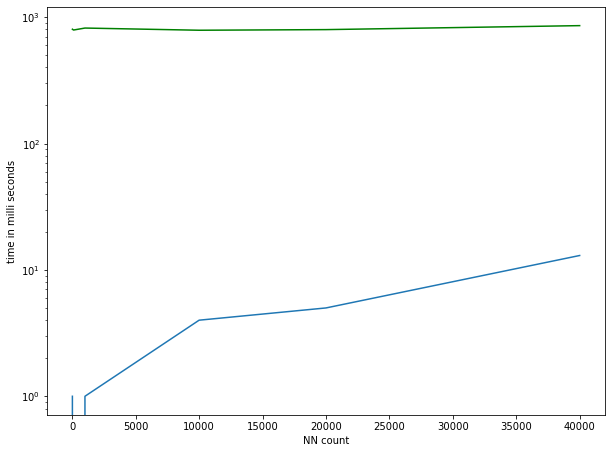

In [10]:
# plot retrieval times together

plt.figure(figsize=(10, 7.5))
a = plt.axes()
a.set_xlabel('NN count')
a.set_ylabel('time in milli seconds')
plt.plot(nns, retrival_time_KD)
plt.plot(nns, retrival_time, color= 'g')
plt.yscale("log")
plt.show()

Analyze the results and summarise them here. 

<span style="color:blue"> Your answer: </span> <br>
1- Simple nn search is much slower because it searches the whole dataset no matter how many K nearest neighbours i search for, thus making the search time constant but slow <br>
2- Using an approximation technique might not get us the exact neighbours but it will be much much faster especially if we want just the first few neighbours <br>
3- The computional cost of approximation techniques is much smaller than searching the whole dataset. <br>
4- in most of the approximation techniques we just have to build the initial searching space once and then with each query search in it with out building it again <br>
5- Approx techniques is the way to go if we have a very large dataset that we need to search in, And if we have a real time application that requires faster responses.

## 2. Gaussian Naive Bayes (4 points)

Finish the implementation of Gaussian NB.

In [11]:
from collections import Counter

class GaussianNB:
    def fit(self, X_train, y_train):
        """
        fit classifier, i.e. calculate needed statistics
        """
        ### START CODE HERE ###
        
        # Sort the data by the class from 0 to 2
        data = np.hstack((X_train,y_train.reshape(-1,1)))
        data = data[data[:,4].argsort(),:]
        
        # Count the occurences of each class in the dataset
        prior_count = [count[1] for count in sorted(Counter(y_train).items(), key=lambda pair: pair[0])]
        
        # initialize the empty arrays and variables
        sum_dataP = 0
        means = np.zeros((len(prior_count),data.shape[1]-1))
        stds = np.zeros((len(prior_count),data.shape[1]-1))
        
        # Loop to get the means & std dvs of each class
        for i in range(len(prior_count)):
            means[i,:] = np.mean(data[sum_dataP:prior_count[i]+sum_dataP], axis= 0)[0:4] 
            stds[i,:] = np.std(data[sum_dataP:prior_count[i]+sum_dataP], axis= 0)[0:4] 
            sum_dataP += prior_count[i]
        
        # Get the prior probability of each class and plug the means & std dvs into the class members
        self.prior = [count/len(y_train) for count in prior_count ]
        self.means = means
        self.std = stds

        ### END CODE HERE ###
        
    def predict(self, X_test):
        """
        predict class labels for test data points
        param: test_data: list of data points to be classified
        return: predictions (class labels)
        """
        ### START CODE HERE ###
        
        # initialize the predictions array
        predictions = []
        
        # Make the gauss probability function
        gauss_prob = lambda x, mean, std_dev: (1 / (np.sqrt(2 * np.pi * std_dev**2))) * np.exp(-((x-mean)**2 / (2 * std_dev**2 )))
        
        # Loop to compute the probability of a point belonging to class for the whole test set
        for i in range (len(X_test)):
            # Compute the probability of the test data belonging to the 3 classes
            class_predictions = [(np.log(self.prior[j]) + np.sum(np.log(gauss_prob(X_test[i],self.means[j],self.std[j])))) for j in range(3)]
            # Choose the highest probability and append it to the list
            predictions.append(np.argmax(class_predictions))
            
        ### END CODE HERE ### 
        return predictions

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# You should get the accuracy score not less than 90%.
print(accuracy_score(y_test, y_pred))

0.9666666666666667


## 3. PCA

Apply PCA to the Digits dataset, produce the scree plot for the given data and decide the optimal number of PCs to keep. Calculate and print their total explained variance.

The explained variance values per component: [14.89059358 13.61877124 11.79459376  8.40997942  5.78241466  4.91691032
  4.31598701  3.66137258  3.3532481   3.07880621  2.37234084  2.27269657
  1.82186331  1.77385494  1.46710109  1.4097156   1.3185892   1.24813782
  1.01771796  0.90561744]
The total explained variance: 89.43031165985266 %


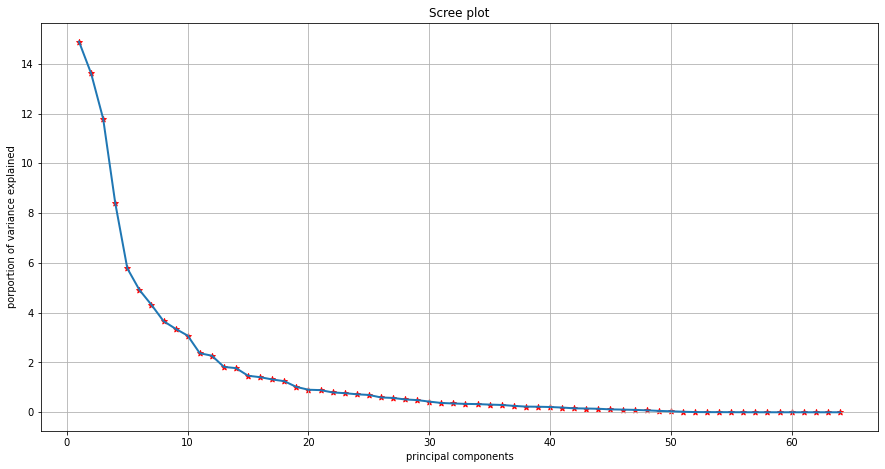

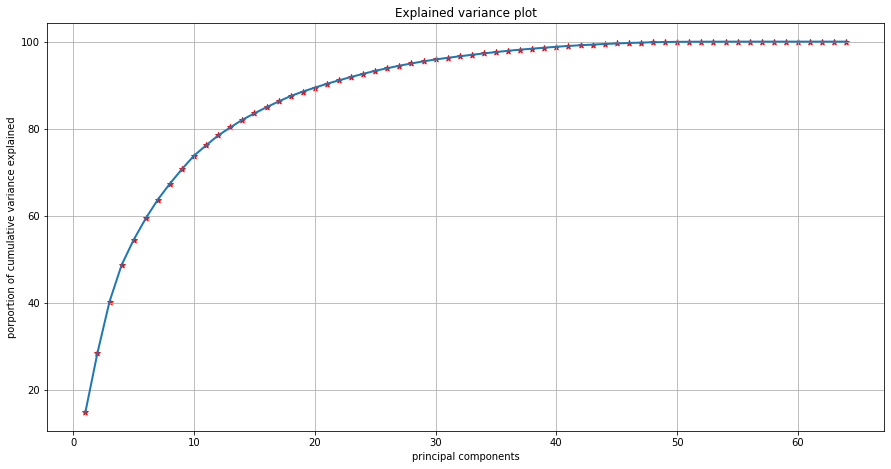

In [13]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

# apply PCA
from sklearn.decomposition import PCA

# Make the PCA object
pca = PCA()
# Fit the object to the data and transform the data
x_PCA = pca.fit_transform(X)

# make scree plot
pca_comp = [i+1 for i in range(len(pca.components_))]

plt.figure(figsize=(15,7.5))
plt.title("Scree plot")
plt.scatter(pca_comp , pca.explained_variance_ratio_ * 100, color= 'r',marker='*', alpha=1)
plt.plot(pca_comp , pca.explained_variance_ratio_ * 100, linewidth= 2)
plt.ylabel('porportion of variance explained')
plt.xlabel('principal components')
plt.grid('True')

# make Cumulative explained variance plot 
plt.figure(figsize=(15,7.5))
plt.title("Explained variance plot")
plt.scatter(pca_comp , np.cumsum(pca.explained_variance_ratio_ * 100), color= 'r',marker='*', alpha=1)
plt.plot(pca_comp , np.cumsum(pca.explained_variance_ratio_ * 100), linewidth= 2)
plt.ylabel('porportion of cumulative variance explained')
plt.xlabel('principal components')
plt.grid('True')

# choose the number PCs and calculate and print their total explained variance
No_Pcs = 20
print("The explained variance values per component:", pca.explained_variance_ratio_[0:No_Pcs]*100)
print("The total explained variance:",np.sum(pca.explained_variance_ratio_[0:No_Pcs])*100,'%')

Thoroughly justify your choice - this is the main part of the work for this task.

<span style="color:blue"> Your answer: </span>
The optimal number of principal components we should keep is around 20 components this will give us a retained variance of around 90%, After checking the scree plot we can clearly see that after the $20^{th}$ component we don't really gain much variance with respect to the complexity and the computational cost. <br>

We can also use the use this basic rule that the selected PCs should be able to describe at least 80% of the variance this way we can retain around 80% of the variance and we should choose only the $first$ 13 components but we will lose an additional 10% variance. <br>

We also have to keep in mind that PCA is not suitable for dimensionality reduction if we want to visualize the data for this particular problem because the $first$ 3 components don't retain more than 45% of the variance of the data and PCA should only be used here for reducing the number of features and to reduce the complexity of the model only.